### Загрузка исходной базы данных

In [1]:
import pandas as pd

df = pd.read_csv('База_данных_отзывы.csv', delimiter=';',header=None, usecols=[10]) # выбираем нужные столбцы
df.columns = ['Отзывы']
documents = df['Отзывы'].dropna().tolist()
print(documents)

FileNotFoundError: [Errno 2] No such file or directory: 'База_данных_отзывы.csv'

In [2]:
documents.pop(0)
print(documents[0])

Впечатление от прочитанной книги Я с большим интересом прочитал книгу о Зулейхе. Автор, несмотря на то,что не могла в силу своего возраста лично видеть реалии описываемого времени, хорошо их изучила и очень убедительно передает тогдашние условия, характеры людей. В некоторой степени я знаю татарскую деревню того времени по рассказам и на своем опыте, но прочитанное серьезно дополнило и мои познания. Считаю, что «Зулейха открывает глаза» поможет читателям, в первую очередь молодежи, в изучении истории нашей страны. Книга ведь не только о татарах. С интересом жду новых произведений Г.Яхиной. Равиль Аклаев


### Предобработка данных

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Загрузка стоп-слов и пунктуации
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('russian'))
punctuation = set(string.punctuation)

preprocessed_text = []

def preprocess_text(text):
    words = word_tokenize(text.lower())  # Привести к нижнему регистру и токенизировать
    filtered_words = [word for word in words if word not in stop_words and word not in punctuation]
    return " ".join(filtered_words)

# Пример предобработки текстовых данных
for i in documents:
    text = i
    preprocessed_text.append(preprocess_text(text))
print(preprocessed_text[10])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


спойлер переживал гг книгу жаль такого неудачника-раму второго дочитывая последние страницы книги принял раздумий пытался донести автор – сцены отрезанными головами начал упиваться чувстве справедливости герой митрой поделом парню повезло… это книга пелевина финал устроил такого мог представить отчаялся такая замечательная книга оставит послевкусие неправильно завершённой истории хэппи энда гг получил ожидал прочту ещё спасибо виктор


In [4]:
import spacy
from spacy import load
from spacy.lang.ru.examples import sentences
from spacy.lang.ru import Russian

preprocessed_lemmatized_text = []

# Загрузка языковой модели spaCy
nlp = spacy.load("ru_core_news_md")

def preprocess_and_lemmatize(text):
    doc = nlp(text.lower())  # Привести к нижнему регистру и лемматизировать
    lemmatized_words = [token.lemma_ for token in doc if token.text not in punctuation and token.text not in stop_words]
    return " ".join(lemmatized_words)

# Пример предобработки и лемматизации текста
for word in preprocessed_text:
    text = word
    preprocessed_lemmatized_text.append(preprocess_and_lemmatize(text))
print(preprocessed_lemmatized_text[10])


спойлер переживать гг книга жаль такой неудачник рама второй дочитывать последний страница книга принять раздумье пытаться донести автор – сцена отрезанными голова начать упиваться чувство справедливость герой митрой поделом парень повезти … это книга пелевин финал устроить такой мочь представить отчаяться такой замечательный книга оставить послевкусие неправильно завершённой история хэппи энда гг получить ожидать прочту ещё спасибо виктор


In [6]:
print(len(preprocessed_lemmatized_text))

6923


In [17]:
print(preprocessed_lemmatized_text[940:950])

['долгожданный роман разочаровал держать напряжение удивлять заставлять плакать узнать новый слог – великолепный сюжет – болезненный роман – потрясающий спасибо', 'донский дно написать шикарно причитал одном дыхание автор писатель безусловно высота вопрос – крайний мера россия россиянин писать такой дмитрий весь уважение – писать пожалуйста фантастика крайний мера действительно придумать ..', 'дорогой читатель давать всё таки быть хвалить книга литературный достоинство тематика написать правильный вещь тема война доброта любовь ближний – ещё значить написать хороший книга сожалению художественный точка зрение это одна самых неудачный книга улицкой затянуть переполнить слащавый религиозный рассуждение назойливый рассуждение духовность коробить неверующий читатель смотрятся пошловато 10 год спустя нынешний время рифмуются лексикон категория человек которыми улицкая вряд хотеть иметь общий написать честной документальный книга реальный герой', 'дорогой навеки любимый дмитрий спасибо.вы-ге

In [37]:
import csv
with open('out.csv', 'w', encoding="utf-8", newline='') as file:
    writer = csv.writer(file)
    writer.writerow(preprocessed_lemmatized_text) #сохранение в csv файл лемматизированные отзывы

### Формирование TF-IDF матрицы ключевых слов

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Пример текстовых данных


# Создание объекта TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Применение TF-IDF к текстовым данным
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_lemmatized_text)

# Получение списка ключевых слов и их значения TF-IDF для первого документа
feature_names = tfidf_vectorizer.get_feature_names()
tfidf_scores = tfidf_matrix.toarray()[0]

# Сортировка слов по значениям TF-IDF
sorted_keywords = [word for _, word in sorted(zip(tfidf_scores, feature_names), reverse=True)]

print("Ключевые слова:", sorted_keywords)

Ключевые слова: ['интерес', 'равиль', 'аклаев', 'прочитать', 'описываемого', 'тогдашний', 'дополнить', 'убедительно', 'познание', 'изучить', 'изучение', 'серьезно', 'молодёжь', 'степень', 'татарин', 'помочь', 'зулейхе', 'свой', 'очередь', 'возраст', 'опыт', 'передавать', 'реалия', 'деревня', 'время', 'лично', 'считать', 'условие', 'несмотря', 'татарский', 'яхиной', 'открывать', 'рассказ', 'видеть', 'некоторый', 'характер', 'зулейха', 'сила', 'больший', 'страна', 'книга', 'читатель', 'глаз', 'ждать', 'знать', 'новый', 'впечатление', 'мой', 'мочь', 'наш', 'первый', 'произведение', 'история', 'человек', 'автор', 'очень', 'ёё', 'ёмкость', 'ёмко', 'ёмкий', 'ёмана', 'ёлка', 'ёжусь', 'ящик', 'яхтная', 'яхта', 'яхниной', 'яхмна', 'яхину', 'яхина', 'яузы', 'яузе', 'яуза', 'ясняемой', 'ясный', 'ясность', 'ясно', 'ярый', 'ярость', 'яростный', 'яростно', 'ярословской', 'ярославский', 'ярославль', 'ярослав', 'ярок', 'ярмольник', 'ярлык', 'яркость', 'ярко', 'яркий', 'яркиий', 'яркие', 'яркая', 'япон

In [9]:
tfidf_matrix.shape

(6923, 22591)

In [9]:
print(tfidf_matrix)

  (0, 384)	0.2117303617261678
  (0, 16222)	0.2117303617261678
  (0, 22577)	0.11213026049796171
  (0, 15564)	0.07074557784268362
  (0, 10833)	0.08889207081779735
  (0, 4898)	0.09111482797755238
  (0, 19661)	0.15066010105754035
  (0, 19193)	0.09712950359492807
  (0, 9900)	0.0801676757638668
  (0, 6728)	0.06142382758548673
  (0, 6341)	0.17026736787101293
  (0, 9023)	0.15624081713669305
  (0, 12422)	0.14484444958507325
  (0, 12674)	0.07564931554354887
  (0, 21856)	0.0944311664945809
  (0, 14114)	0.14757005944930696
  (0, 3403)	0.09156047190758086
  (0, 12091)	0.10989628236389712
  (0, 6081)	0.09990627628672223
  (0, 19498)	0.12007343180175391
  (0, 13812)	0.17448645961789058
  (0, 9003)	0.08660333782356275
  (0, 4479)	0.1905265351871058
  (0, 17738)	0.16841510457707445
  (0, 11733)	0.14073274057139232
  :	:
  (6921, 19234)	0.11744137365702535
  (6921, 15672)	0.17644672402693504
  (6921, 17712)	0.12920931886186737
  (6921, 22522)	0.08186203613924403
  (6921, 21863)	0.06384005779066557
  (69

### Преобразование столбца "Ценности" в числовой список для классификатора

In [23]:
tfidf_matrix.shape

(6923, 22591)

In [24]:
tsvd_data2D.shape

(6923, 1024)

In [6]:
import pandas as pd

df = pd.read_csv('База_данных_отзывы.csv', delimiter=';',header=0, usecols=[10,17]) # выбираем нужные столбцы

In [7]:
df = df.dropna()

In [8]:
df["Ценности"] = df["Ценности"].replace({'релевантно':1, 'не определено':0 })

In [9]:
values = df['Ценности'].tolist()

In [16]:
print(values[940:950])

[1, 1, 1, 0, 0, 0, 1, 1, 1, 1]


In [38]:
df["Ценности"].sum()

3763

### Классификатор случайного леса

#### Использование матрицы  TF-IDF обычной размерности

In [10]:
from sklearn.model_selection import train_test_split

x = tfidf_matrix
y = values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=90)

In [11]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=3000,max_depth=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [13]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.549831487722677


In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       935
           1       0.55      1.00      0.71      1142

    accuracy                           0.55      2077
   macro avg       0.27      0.50      0.35      2077
weighted avg       0.30      0.55      0.39      2077



C:\Users\1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
import numpy as np
np.array(y_test).sum()

1142

In [41]:
y_pred.shape

(2077,)

In [43]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [42]:
y_pred.sum()

2077

In [22]:
tsvd_data2D.shape

(6923, 1024)

#### Использование матрицы  TF-IDF пониженной размерности

In [14]:
from sklearn.decomposition import TruncatedSVD
## Понижение размерности
tsvd2D = TruncatedSVD(n_components=1024)
tsvd_data2D = tsvd2D.fit_transform(tfidf_matrix)

In [15]:
from sklearn.model_selection import train_test_split

x = tsvd_data2D
y = values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=90)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=2000,max_depth=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.01      0.02       935
           1       0.55      1.00      0.71      1142

    accuracy                           0.55      2077
   macro avg       0.70      0.51      0.37      2077
weighted avg       0.68      0.55      0.40      2077



In [16]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5541646605681271


In [65]:
y_pred.sum()

2070

### Метод K-ближайших соседей

#### Использование матрицы  TF-IDF обычной размерности

In [221]:
from sklearn.model_selection import train_test_split

x = tfidf_matrix
y = values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=90)

In [222]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 1024)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [224]:

from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(sum(y_pred), y_pred.shape)

Accuracy: 0.6624939817043813
1753 (2077,)


In [215]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.30      0.44       935
           1       0.63      0.96      0.76      1142

    accuracy                           0.66      2077
   macro avg       0.74      0.63      0.60      2077
weighted avg       0.73      0.66      0.62      2077



In [223]:
print(sum(y_pred), y_pred.shape)

1753 (2077,)


#### Использование матрицы  TF-IDF пониженной размерности

In [25]:
# возьмем в качестве X матрицу пониженной размерности
from sklearn.model_selection import train_test_split

x = tsvd_data2D
y = values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=90)

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 1024)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


C:\Users\1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [226]:

from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(sum(y_pred), y_pred.shape)

Accuracy: 0.549831487722677
2077 (2077,)


In [227]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.00      0.00      0.00       935
           1       0.55      1.00      0.71      1142

    accuracy                           0.55      2077
   macro avg       0.27      0.50      0.35      2077
weighted avg       0.30      0.55      0.39      2077



C:\Users\1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Логистическая регрессия

#### Использование матрицы  TF-IDF обычной размерности

In [232]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
x = tfidf_matrix
y = values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=90)
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(sum(y_pred), y_pred.shape)

Accuracy: 0.8757823784304285
1032 (2077,)


In [233]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       935
           1       0.93      0.84      0.88      1142

    accuracy                           0.88      2077
   macro avg       0.88      0.88      0.88      2077
weighted avg       0.88      0.88      0.88      2077



#### Использование матрицы  TF-IDF пониженной размерности

In [234]:
## возьмем в качестве X матрицу пониженной размерности
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
x = tsvd_data2D
y = values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=90)
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(sum(y_pred), y_pred.shape)

Accuracy: 0.8801155512758787
1029 (2077,)


In [235]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87       935
           1       0.93      0.84      0.89      1142

    accuracy                           0.88      2077
   macro avg       0.88      0.88      0.88      2077
weighted avg       0.89      0.88      0.88      2077



### Тематическое моделирование

#### Неотрицательная матричная факторизация (NMF)

In [19]:
from sklearn.decomposition import NMF
import csv
# Подготовка данных
X = tfidf_matrix

# Применение NMF
num_topics = 1000
nmf = NMF(n_components=num_topics, random_state=42)
nmf.fit(X)

# Вывод слов для каждой темы
feature_names = tfidf_vectorizer.get_feature_names()
with open('Тематическое_моделирование_NMF.csv', 'w', encoding="utf-8", newline='') as file:
        writer = csv.writer(file)
        for topic_idx, topic_words in enumerate(nmf.components_):
            top_words_idx = topic_words.argsort()[-10:][::-1]
            top_words = [feature_names[i] for i in top_words_idx]
            writer.writerow(top_words)

C:\Users\1\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [20]:
nmf_matrix = nmf.fit_transform(X)

C:\Users\1\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [50]:
nmf_tr = nmf_matrix.T

In [107]:
trans = nmf_tr.T
print(trans) # наша первоначальная матрица с уверенностью, что отзыв принадлежит теме

[[0.10499033 0.         0.03552792 ... 0.         0.         0.00970392]
 [0.15641078 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.04659834 ... 0.         0.         0.00426797]
 ...
 [0.08857934 0.         0.         ... 0.         0.         0.        ]
 [0.08197287 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [37]:
tm = pd.DataFrame(nmf_matrix, columns=['Тема№'+f'{i}' for i in range(1,1001)])
tm.head(10)

Тема№1    Тема№2    Тема№3    Тема№4    Тема№5  Тема№6    Тема№7  \
0  0.104990  0.000000  0.035528  0.020619  0.000000     0.0  0.000000   
1  0.156411  0.000000  0.000000  0.092175  0.000000     0.0  0.000000   
2  0.000000  0.000000  0.046598  0.000000  0.000000     0.0  0.013993   
3  0.000000  0.012904  0.000000  0.027982  0.000000     0.0  0.000000   
4  0.079935  0.000000  0.000000  0.000000  0.000000     0.0  0.000000   
5  0.069671  0.000000  0.047157  0.013667  0.000000     0.0  0.000000   
6  0.030212  0.000000  0.000000  0.017797  0.000000     0.0  0.000000   
7  0.000000  0.000000  0.000000  0.000000  0.060232     0.0  0.000000   
8  0.037639  0.000000  0.000000  0.000000  0.000000     0.0  0.068918   
9  0.138120  0.000000  0.000000  0.000000  0.000000     0.0  0.000000   

     Тема№8   Тема№9   Тема№10  ...  Тема№991  Тема№992  Тема№993  Тема№994  \
0  0.000000  0.00018  0.031556  ...  0.000000  0.001134  0.000000  0.021037   
1  0.000000  0.00000  0.000011  ...  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.00000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.00000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.00000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
5  0.018559  0.00000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
6  0.000000  0.00000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
7  0.000000  0.00000  0.000000  ...  0.001196  0.000000  0.000000  0.000000   
8  0.000000  0.00000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
9  0.000000  0.00000  0.000000  ...  0.000000  0.000000  0.026235  0.000000   

   Тема№995  Тема№996  Тема№997  Тема№998  Тема№999  Тема№1000  
0       0.0  0.003027  0.073996       0.0       0.0   0.009704  
1       0.0  0.000000  0.000000       0.0       0.0   0.000000  
2       0.0  0.000000  0.000000       0.0       0.0   0.004268  
3       0.0  0.000000  0.000000       0.0       0.0   0.000000  
4       0.0  0.000000  0.000000       0.0       0.0   0.000000  
5       0.0  0.000000  0.000000       0.0       0.0   0.000000  
6       0.0  0.000000  0.008441       0.0       0.0   0.000000  
7       0.0  0.000000  0.000000       0.0       0.0   0.000000  
8       0.0  0.000874  0.000000       0.0       0.0   0.000000  
9       0.0  0.000227  0.152919       0.0       0.0   0.000000  

[10 rows x 1000 columns]

In [38]:
tm.insert(loc = 1000,
          column = 'Ценности',
          value = values)

In [39]:
tm.head(10)

Тема№1    Тема№2    Тема№3    Тема№4    Тема№5  Тема№6    Тема№7  \
0  0.104990  0.000000  0.035528  0.020619  0.000000     0.0  0.000000   
1  0.156411  0.000000  0.000000  0.092175  0.000000     0.0  0.000000   
2  0.000000  0.000000  0.046598  0.000000  0.000000     0.0  0.013993   
3  0.000000  0.012904  0.000000  0.027982  0.000000     0.0  0.000000   
4  0.079935  0.000000  0.000000  0.000000  0.000000     0.0  0.000000   
5  0.069671  0.000000  0.047157  0.013667  0.000000     0.0  0.000000   
6  0.030212  0.000000  0.000000  0.017797  0.000000     0.0  0.000000   
7  0.000000  0.000000  0.000000  0.000000  0.060232     0.0  0.000000   
8  0.037639  0.000000  0.000000  0.000000  0.000000     0.0  0.068918   
9  0.138120  0.000000  0.000000  0.000000  0.000000     0.0  0.000000   

     Тема№8   Тема№9   Тема№10  ...  Тема№992  Тема№993  Тема№994  Тема№995  \
0  0.000000  0.00018  0.031556  ...  0.001134  0.000000  0.021037       0.0   
1  0.000000  0.00000  0.000011  ...  0.000000  0.000000  0.000000       0.0   
2  0.000000  0.00000  0.000000  ...  0.000000  0.000000  0.000000       0.0   
3  0.000000  0.00000  0.000000  ...  0.000000  0.000000  0.000000       0.0   
4  0.000000  0.00000  0.000000  ...  0.000000  0.000000  0.000000       0.0   
5  0.018559  0.00000  0.000000  ...  0.000000  0.000000  0.000000       0.0   
6  0.000000  0.00000  0.000000  ...  0.000000  0.000000  0.000000       0.0   
7  0.000000  0.00000  0.000000  ...  0.000000  0.000000  0.000000       0.0   
8  0.000000  0.00000  0.000000  ...  0.000000  0.000000  0.000000       0.0   
9  0.000000  0.00000  0.000000  ...  0.000000  0.026235  0.000000       0.0   

   Тема№996  Тема№997  Тема№998  Тема№999  Тема№1000  Ценности  
0  0.003027  0.073996       0.0       0.0   0.009704         1  
1  0.000000  0.000000       0.0       0.0   0.000000         0  
2  0.000000  0.000000       0.0       0.0   0.004268         1  
3  0.000000  0.000000       0.0       0.0   0.000000         1  
4  0.000000  0.000000       0.0       0.0   0.000000         1  
5  0.000000  0.000000       0.0       0.0   0.000000         1  
6  0.000000  0.008441       0.0       0.0   0.000000         1  
7  0.000000  0.000000       0.0       0.0   0.000000         0  
8  0.000874  0.000000       0.0       0.0   0.000000         0  
9  0.000227  0.152919       0.0       0.0   0.000000         1  

[10 rows x 1001 columns]

In [71]:
q = tm[(tm['Ценности'] == 1)]
q

Тема№1    Тема№2    Тема№3    Тема№4  Тема№5    Тема№6    Тема№7  \
0     0.104990  0.000000  0.035528  0.020619     0.0  0.000000  0.000000   
2     0.000000  0.000000  0.046598  0.000000     0.0  0.000000  0.013993   
3     0.000000  0.012904  0.000000  0.027982     0.0  0.000000  0.000000   
4     0.079935  0.000000  0.000000  0.000000     0.0  0.000000  0.000000   
5     0.069671  0.000000  0.047157  0.013667     0.0  0.000000  0.000000   
...        ...       ...       ...       ...     ...       ...       ...   
6915  0.110687  0.000000  0.037464  0.000000     0.0  0.041189  0.045039   
6916  0.127443  0.000312  0.000000  0.000000     0.0  0.000000  0.000000   
6917  0.000000  0.000000  0.053699  0.000000     0.0  0.000000  0.000000   
6919  0.072576  0.000000  0.000000  0.042768     0.0  0.081168  0.000000   
6920  0.088579  0.000000  0.000000  0.026084     0.0  0.000000  0.000000   

        Тема№8   Тема№9   Тема№10  ...  Тема№992  Тема№993  Тема№994  \
0     0.000000  0.00018  0.031556  ...  0.001134  0.000000  0.021037   
2     0.000000  0.00000  0.000000  ...  0.000000  0.000000  0.000000   
3     0.000000  0.00000  0.000000  ...  0.000000  0.000000  0.000000   
4     0.000000  0.00000  0.000000  ...  0.000000  0.000000  0.000000   
5     0.018559  0.00000  0.000000  ...  0.000000  0.000000  0.000000   
...        ...      ...       ...  ...       ...       ...       ...   
6915  0.058978  0.00000  0.000000  ...  0.000000  0.014013  0.000000   
6916  0.033953  0.00000  0.000000  ...  0.000000  0.000000  0.000000   
6917  0.000000  0.00000  0.000000  ...  0.000000  0.020086  0.000000   
6919  0.000000  0.06793  0.000000  ...  0.000000  0.027572  0.000000   
6920  0.035397  0.00000  0.000000  ...  0.000000  0.000000  0.000000   

      Тема№995  Тема№996  Тема№997  Тема№998  Тема№999  Тема№1000  Ценности  
0          0.0  0.003027  0.073996       0.0       0.0   0.009704         1  
2          0.0  0.000000  0.000000       0.0       0.0   0.004268         1  
3          0.0  0.000000  0.000000       0.0       0.0   0.000000         1  
4          0.0  0.000000  0.000000       0.0       0.0   0.000000         1  
5          0.0  0.000000  0.000000       0.0       0.0   0.000000         1  
...        ...       ...       ...       ...       ...        ...       ...  
6915       0.0  0.000000  0.012140       0.0       0.0   0.000000         1  
6916       0.0  0.000000  0.000000       0.0       0.0   0.000000         1  
6917       0.0  0.000000  0.000000       0.0       0.0   0.000000         1  
6919       0.0  0.006630  0.000000       0.0       0.0   0.000000         1  
6920       0.0  0.004655  0.000000       0.0       0.0   0.000000         1  

[3763 rows x 1001 columns]

In [72]:
q.shape

(3763, 1001)

In [78]:
name = list(tm.columns)
name.pop(-1)
w = q[name]

In [83]:
w

Тема№1    Тема№2    Тема№3    Тема№4  Тема№5    Тема№6    Тема№7  \
0     0.104990  0.000000  0.035528  0.020619     0.0  0.000000  0.000000   
2     0.000000  0.000000  0.046598  0.000000     0.0  0.000000  0.013993   
3     0.000000  0.012904  0.000000  0.027982     0.0  0.000000  0.000000   
4     0.079935  0.000000  0.000000  0.000000     0.0  0.000000  0.000000   
5     0.069671  0.000000  0.047157  0.013667     0.0  0.000000  0.000000   
...        ...       ...       ...       ...     ...       ...       ...   
6915  0.110687  0.000000  0.037464  0.000000     0.0  0.041189  0.045039   
6916  0.127443  0.000312  0.000000  0.000000     0.0  0.000000  0.000000   
6917  0.000000  0.000000  0.053699  0.000000     0.0  0.000000  0.000000   
6919  0.072576  0.000000  0.000000  0.042768     0.0  0.081168  0.000000   
6920  0.088579  0.000000  0.000000  0.026084     0.0  0.000000  0.000000   

        Тема№8   Тема№9   Тема№10  ...  Тема№991  Тема№992  Тема№993  \
0     0.000000  0.00018  0.031556  ...       0.0  0.001134  0.000000   
2     0.000000  0.00000  0.000000  ...       0.0  0.000000  0.000000   
3     0.000000  0.00000  0.000000  ...       0.0  0.000000  0.000000   
4     0.000000  0.00000  0.000000  ...       0.0  0.000000  0.000000   
5     0.018559  0.00000  0.000000  ...       0.0  0.000000  0.000000   
...        ...      ...       ...  ...       ...       ...       ...   
6915  0.058978  0.00000  0.000000  ...       0.0  0.000000  0.014013   
6916  0.033953  0.00000  0.000000  ...       0.0  0.000000  0.000000   
6917  0.000000  0.00000  0.000000  ...       0.0  0.000000  0.020086   
6919  0.000000  0.06793  0.000000  ...       0.0  0.000000  0.027572   
6920  0.035397  0.00000  0.000000  ...       0.0  0.000000  0.000000   

      Тема№994  Тема№995  Тема№996  Тема№997  Тема№998  Тема№999  Тема№1000  
0     0.021037       0.0  0.003027  0.073996       0.0       0.0   0.009704  
2     0.000000       0.0  0.000000  0.000000       0.0       0.0   0.004268  
3     0.000000       0.0  0.000000  0.000000       0.0       0.0   0.000000  
4     0.000000       0.0  0.000000  0.000000       0.0       0.0   0.000000  
5     0.000000       0.0  0.000000  0.000000       0.0       0.0   0.000000  
...        ...       ...       ...       ...       ...       ...        ...  
6915  0.000000       0.0  0.000000  0.012140       0.0       0.0   0.000000  
6916  0.000000       0.0  0.000000  0.000000       0.0       0.0   0.000000  
6917  0.000000       0.0  0.000000  0.000000       0.0       0.0   0.000000  
6919  0.000000       0.0  0.006630  0.000000       0.0       0.0   0.000000  
6920  0.000000       0.0  0.004655  0.000000       0.0       0.0   0.000000  

[3763 rows x 1000 columns]

In [92]:
res = []
for column in w.columns:
     
    # Storing the rows of a column 
    # into a temporary list
    li = w[column].tolist()
     
    # appending the temporary list
    res.append(li)
print(len(res))

1000


In [91]:
t = [sum(nmf_tr[i]) for i in range(1000)] # суммы по темам по всем отзывам
print(t)

[394.9530659781453, 13.951698656522414, 87.19576674565373, 101.47709144600549, 61.07440704665421, 65.05688880891678, 68.47629143891476, 69.25311302300376, 40.074275609185044, 24.518654705939827, 6.768737847613571, 34.44053806722633, 39.21079045753185, 36.280711713370216, 38.0829468839477, 13.49105514660073, 25.95678949785181, 24.412942168417914, 25.627937648629686, 33.47267223093138, 34.39653939752911, 19.810912454493966, 14.304502316545003, 19.873237388463796, 13.109796786937137, 19.192019733217453, 7.069854072496167, 19.098241620540865, 16.734862771455447, 15.497134023960783, 3.0550353595363187, 25.912072626793822, 3.827289483551245, 18.48671810072615, 15.694027498971854, 19.44240567767632, 13.038120465780356, 21.568107127992896, 14.59949089217382, 15.15015788538484, 4.36003321611624, 15.529176649354767, 19.500147185338452, 11.990566256347112, 17.87900751946022, 18.295343296127108, 20.974872229166248, 10.923839192074343, 12.344466614649162, 3.3655777501048325, 13.471015407817, 13.114

In [94]:
sum_1 = [sum(res[i]) for i in range(1000)] # суммы по темам по релевантным отзывам
print(sum_1)

[207.86042138105645, 6.238268427094008, 61.40920873360009, 51.121366778153124, 30.632134873608333, 29.130138955963133, 34.87146581664625, 36.943591843443, 18.004041253052346, 9.417942566375642, 4.869981977206422, 16.764160469894648, 21.601272103934203, 17.561135627647406, 18.44273943150202, 7.675556433521682, 12.832284110053335, 8.90924312526488, 12.717362866774918, 16.765268209242265, 19.596868331178538, 19.80183481321806, 6.329418035241704, 12.03459494685519, 8.700801977915773, 7.937724598082853, 3.7990770518532924, 12.24960727404622, 8.061753361222392, 8.261050505434968, 2.339174766309958, 12.398726131460135, 2.664740478621685, 10.429369005622137, 7.113603922724838, 9.836563666440538, 7.399862725582668, 10.812602661061085, 8.029389643983192, 8.562258480183436, 2.453885800728056, 8.328508540731963, 9.528075091821536, 5.523507545796112, 12.223645939074503, 9.661385048772875, 10.702381759326585, 5.8704403328185215, 5.772264828929009, 1.2842148842116976, 6.653432459930813, 7.03494579844

In [152]:
import numpy as np
p = np.array(sum_1)/np.array(t)
print(p) # средняя вероятность по всем релевантным отзывам по темам, т.е. вероятность того, что тема соответствует культурной ценности

[0.52629145 0.44713325 0.70426823 0.50377249 0.50155436 0.4477641
 0.50924875 0.53345749 0.44926679 0.38411335 0.71948155 0.48675664
 0.55090121 0.48403504 0.48427816 0.5689367  0.494371   0.36493935
 0.49623044 0.50086435 0.56973372 0.99954179 0.44247733 0.60556792
 0.66368702 0.41359506 0.53736287 0.64139974 0.48173406 0.53306957
 0.76567846 0.47849226 0.69624743 0.56415471 0.45326822 0.50593346
 0.56755594 0.50132367 0.54997737 0.56515969 0.56281356 0.53631359
 0.48861555 0.46065444 0.68368705 0.52807892 0.51024777 0.53739718
 0.46759937 0.38157338 0.49390727 0.53643962 0.59636136 0.59943373
 0.59685286 0.55958569 0.57290633 0.55605451 0.3787184  0.58807908
 0.66065809 0.99265326 0.42034967 0.44151294 0.50045924 0.55060311
 0.70674532 0.56552792 0.56491177 0.99591601 0.46559939 0.53619068
 0.88877812 0.75249662 0.53892221 0.4774367  0.86793275 0.54438414
 0.63740255 0.41898651 0.42601251 0.56618377 0.47494205 0.53085626
 0.60018812 0.51721002 0.41499395 0.46265715 0.60948546 0.64071

In [237]:
pik = p[p > 0.9] # выберем те темы, где вероятность больше 0.9
print(pik)

[0.99954179 0.99265326 0.99591601 0.98002233 0.91442632 0.99492963
 0.99176281 0.96823075 0.95794156 0.98751548 0.96345038 0.98006043
 0.9518331  0.93842551 0.92581633 0.91778993 0.90123918 0.94794695
 0.99872153 0.96071921 0.96104497 0.90221784 0.90571989 0.97787906
 0.99729301]


In [246]:
inde = []

for i in pik: # 
    inde.append(p.tolist().index(i))
print(inde) 

[21, 61, 69, 107, 119, 129, 135, 220, 246, 259, 331, 364, 368, 447, 496, 499, 558, 565, 578, 627, 710, 747, 802, 824, 992]


In [247]:
with open('Тематическое_моделирование_NMF.csv',encoding="utf-8") as fd:
    reader=csv.reader(fd)
    interestingrows=[row for idx, row in enumerate(reader) if idx in inde]

In [249]:
for i in interestingrows:
    print(i) #рассмотрим, что это за темы по ключевым словам

['любовь', 'нежность', 'сострадание', 'преданность', 'жертвенный', 'наглость', 'раздавленных', 'ошибшихся', 'издевательство', 'разделить']
['день', 'ходить', 'данную', 'ускользнуть', 'петровым', 'затаив', 'саднить', 'переосмыслилось', 'минувший', 'запасть']
['сила', 'сверх', 'находить', 'захлестнуть', 'заранее', 'материнство', 'смирение', 'миг', 'волна', 'вынести']
['правда', 'тяжеловато', 'отечество', 'интернат', 'щипать', 'мировой', 'вникать', 'многострадальный', 'натура', 'переживается']
['дело', 'самом', 'специфичная', 'поверить', 'удерэивает', 'прикасаешься', 'вплоть', 'искромётный', 'возрождаться', 'необыкновенной']
['работа', 'проделать', 'проделанную', 'данная', 'исследовательский', 'выполнить', 'колоссальный', 'дебютный', 'соскучиться', 'фандориных']
['душевный', 'терзание', 'метание', 'встречалось', 'мечтать', 'навзрыд', 'искалеченные', 'переплетенные', 'проникновенное', 'ненавязчивый']
['семья', 'коснуться', 'репрессировать', 'совесть', 'дедушка', 'бабуля', 'галантный', 'отт

In [173]:
ind = [i for i in range(1,1001)]

In [181]:
from matplotlib.backends.backend_pdf import PdfPages

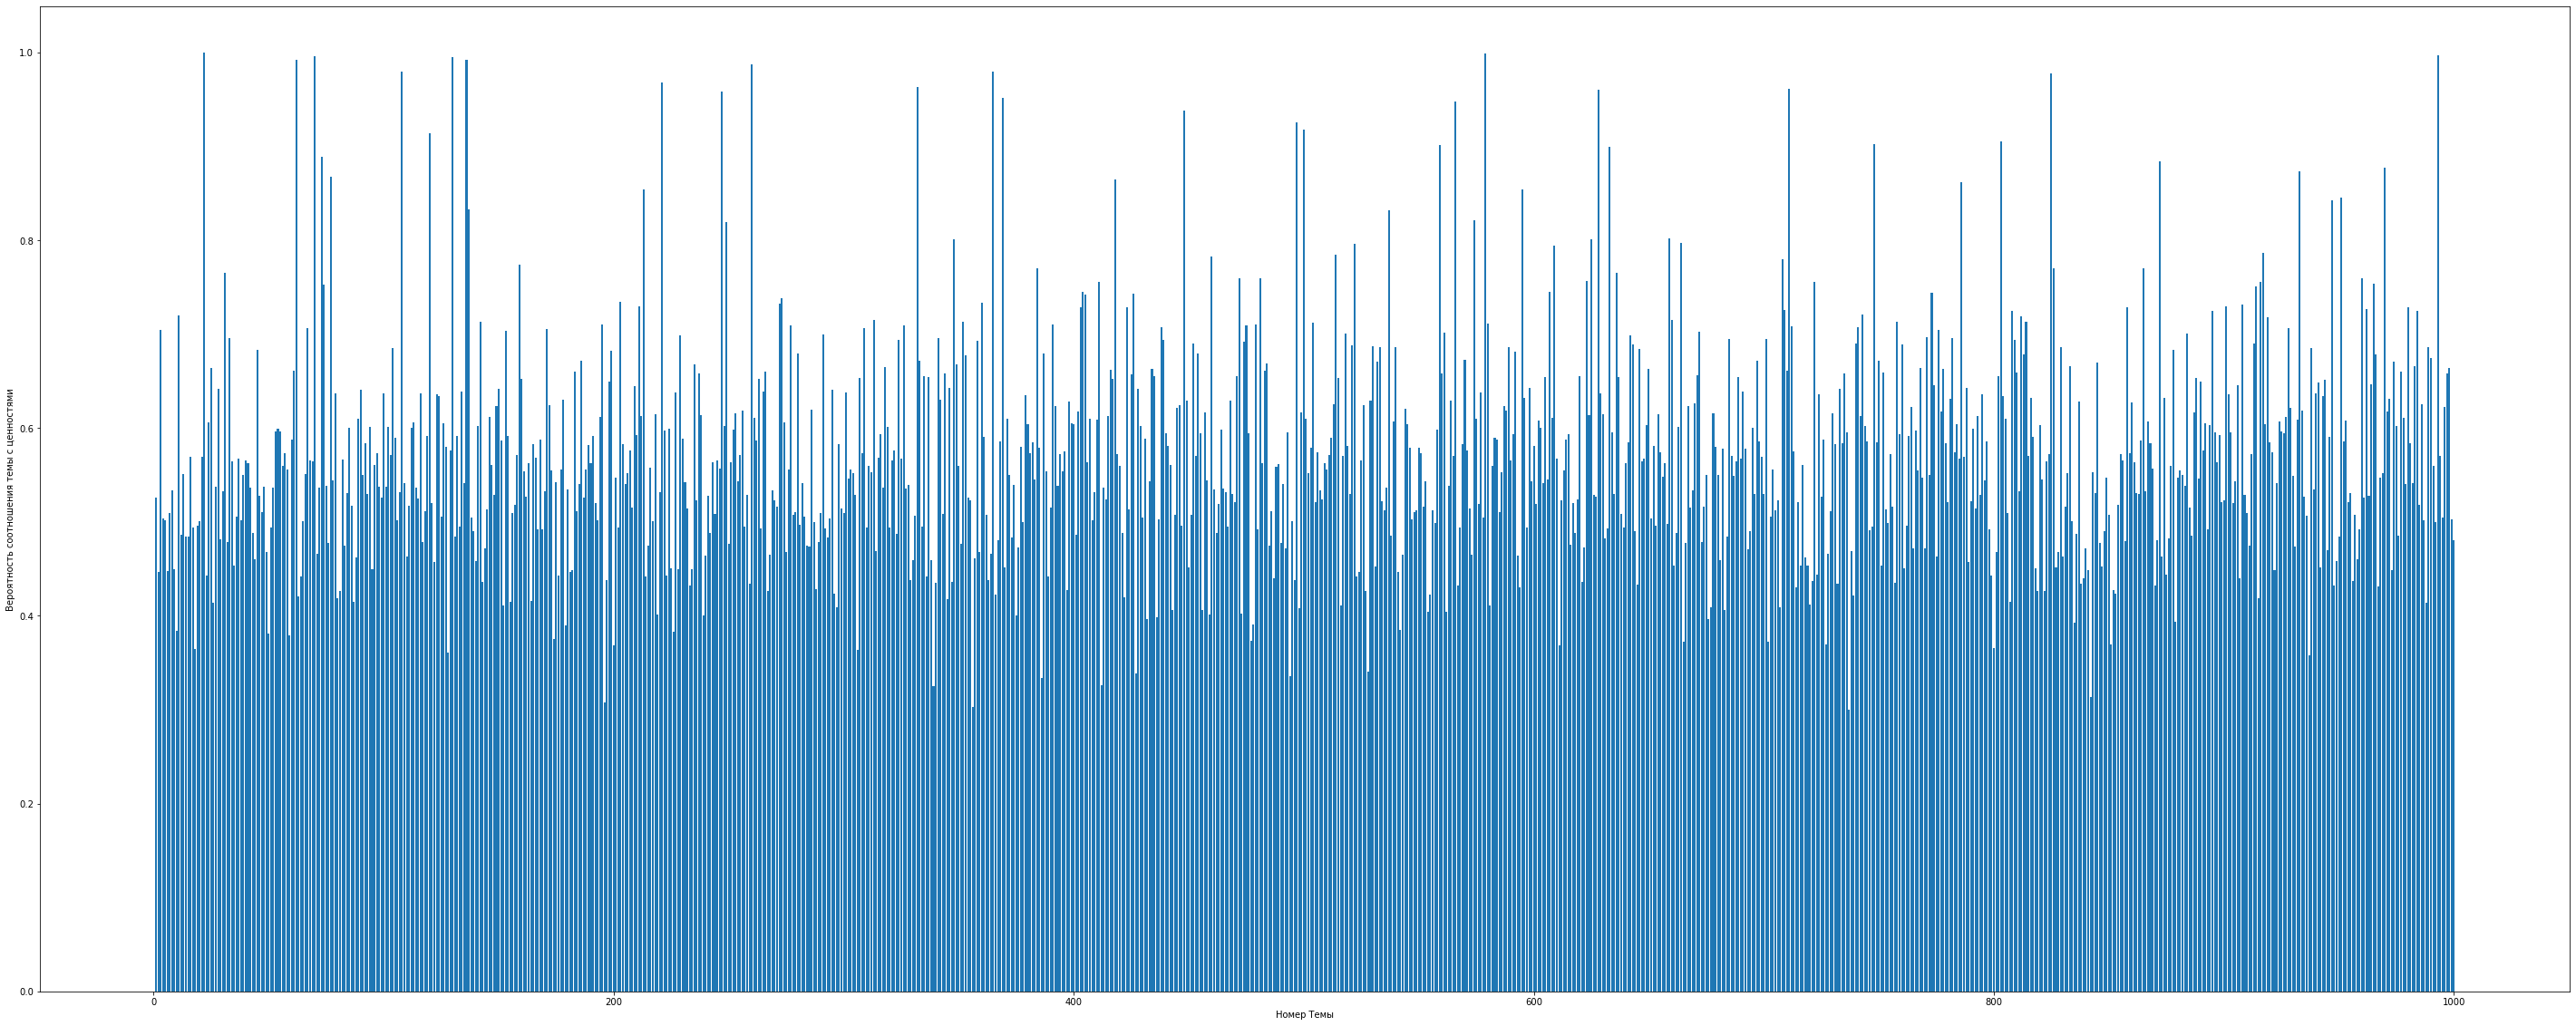

In [191]:

fig = plt.figure(figsize=(50,20))
plt.xlabel('Номер Темы')
plt.ylabel('Вероятность соотношения темы с ценностями')
plt.bar(ind,p)
#plt.show()
pdf = PdfPages("Гистограмма.pdf")
pdf.savefig(fig)


# Сохранение файла
pdf.close()


In [183]:
min_v = min(p)
max_v = max(p)
print(min_v, max_v)

0.3001661487291516 0.999541785806345


In [153]:
itog = []
for i in trans:
    y = np.array(i)*np.array(p)
    itog.append(y)
print(itog)
    

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [154]:
np.array(itog).shape

(6923, 1000)

In [155]:
da = pd.DataFrame(np.array(itog), columns=['Тема№'+f'{i}' for i in range(1,1001)])
da.head(10) # итоговый вариант

Тема№1   Тема№2    Тема№3    Тема№4    Тема№5  Тема№6    Тема№7  Тема№8  \
0  0.055256  0.00000  0.025021  0.010387  0.000000     0.0  0.000000  0.0000   
1  0.082318  0.00000  0.000000  0.046435  0.000000     0.0  0.000000  0.0000   
2  0.000000  0.00000  0.032818  0.000000  0.000000     0.0  0.007126  0.0000   
3  0.000000  0.00577  0.000000  0.014097  0.000000     0.0  0.000000  0.0000   
4  0.042069  0.00000  0.000000  0.000000  0.000000     0.0  0.000000  0.0000   
5  0.036667  0.00000  0.033211  0.006885  0.000000     0.0  0.000000  0.0099   
6  0.015900  0.00000  0.000000  0.008966  0.000000     0.0  0.000000  0.0000   
7  0.000000  0.00000  0.000000  0.000000  0.030209     0.0  0.000000  0.0000   
8  0.019809  0.00000  0.000000  0.000000  0.000000     0.0  0.035096  0.0000   
9  0.072691  0.00000  0.000000  0.000000  0.000000     0.0  0.000000  0.0000   

     Тема№9   Тема№10  ...  Тема№991  Тема№992  Тема№993  Тема№994  Тема№995  \
0  0.000081  0.012121  ...  0.000000  0.000567  0.000000  0.011995       0.0   
1  0.000000  0.000004  ...  0.000000  0.000000  0.000000  0.000000       0.0   
2  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000       0.0   
3  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000       0.0   
4  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000       0.0   
5  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000       0.0   
6  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000       0.0   
7  0.000000  0.000000  ...  0.000669  0.000000  0.000000  0.000000       0.0   
8  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000       0.0   
9  0.000000  0.000000  ...  0.000000  0.000000  0.026164  0.000000       0.0   

   Тема№996  Тема№997  Тема№998  Тема№999  Тема№1000  
0  0.001883  0.048717       0.0       0.0   0.004662  
1  0.000000  0.000000       0.0       0.0   0.000000  
2  0.000000  0.000000       0.0       0.0   0.002051  
3  0.000000  0.000000       0.0       0.0   0.000000  
4  0.000000  0.000000       0.0       0.0   0.000000  
5  0.000000  0.000000       0.0       0.0   0.000000  
6  0.000000  0.005557       0.0       0.0   0.000000  
7  0.000000  0.000000       0.0       0.0   0.000000  
8  0.000544  0.000000       0.0       0.0   0.000000  
9  0.000141  0.100677       0.0       0.0   0.000000  

[10 rows x 1000 columns]

### Кластеризация и категоризация текстовых данных

In [42]:
from sklearn.cluster import KMeans
import numpy as np

import csv
with open('кластеры_отзывов.csv', 'w', encoding="utf-8", newline='') as file:
    writer = csv.writer(file)
    writer.writerow(preprocessed_lemmatized_text) 
    
# Применение кластеризации KMeans к матрице TF-IDF
num_clusters = 100
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(tfidf_matrix)
klaster = []
with open('кластеры_отзывов.csv', 'w', encoding="utf-8", newline='') as file:
    writer = csv.writer(file)
# Показать примеры документов в каждом кластере
    for cluster_id in range(num_clusters):
        cluster_indices = np.where(kmeans.labels_ == cluster_id)[0]
        print(f"Кластер {cluster_id + 1}:")
        for idx in cluster_indices:
            print(documents[idx])
            klaster.append(documents[idx])
        writer.writerow(klaster)
        klaster = []
        print("--------")

Кластер 1:
выбрать книга посмотреть высокий рейтинг популярность книга оказаться ничто учить дарить хороший настроение расслаблять унылый сюжет минимум позитивный момент вспомнить американский боевик ...... этот книга жанре …
этот книга путь человеческий душа её роль плетение полотно мироздание любой ошибка исправить пусть необычный образ отсутствие предел возможность человека.глубокая увлекательный необычный история опечатка текст которые вырывать течение история отменять талант автор написать выше её сложный описать простой порекомендовать
еле дочитала очень тяжело зайти этот книга ожидать яркий подобный " зулейхе " произведение увы ..
честно разочаровать столько говорить книга ожидать таааакооого … книга тяжёлый равный читаться залп принцип сделать очень качественно слишком неправдоподобный нюанс это добавлять острота сюжет подрывать вера реальность история – зря написать очень осязаемо вместе деликатно ужасный вещь описываться это читать целом – нравиться выбор ... далее
этот книга

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [41]:
print(documents[0])

отзыв


### Синонимы

In [18]:
import bs4 as bs
import urllib.request
import re
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
# Объединяем вcе отзывы в переменной article_text.
article_text = ""
for p in documents: article_text += p
# переводим все символы в нижний регистр.
cleaned_article = article_text.lower()
# Оставляем только буквы и убираем пробелы, используя регулярные выражения.
cleaned_article = re.sub('[^a-я]', ' ', cleaned_article)
cleaned_article = re.sub(r'\s+', ' ', cleaned_article)
# Готовим датасет для обучения
all_sentences = nltk.sent_tokenize(cleaned_article)
all_words = [nltk.word_tokenize(sent) for sent in all_sentences]
# Проходимся по датасету и удаляем стоп-слова 
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('russian')]
#Создаем модель Word2Vec со словами, чаще всего встречающимися в тексте
word2vec = Word2Vec(all_words, min_count=3)
print(word2vec.wv.most_similar('справедливость', topn=5))

[('всеми', 0.3400350511074066), ('вселенский', 0.32020196318626404), ('принятие', 0.30047371983528137), ('айтматов', 0.2998898923397064), ('описании', 0.2987246513366699)]


In [23]:
print(word2vec.wv.most_similar('труд', topn=100))

[('ощущение', 0.4102131128311157), ('чтение', 0.39992693066596985), ('читать', 0.3985901474952698), ('открывать', 0.3985522985458374), ('мир', 0.3878454267978668), ('старый', 0.38678237795829773), ('приключение', 0.38561367988586426), ('прекрасный', 0.38289669156074524), ('мочь', 0.3813655376434326), ('получаться', 0.3796713054180145), ('нок', 0.3707120418548584), ('книга', 0.3663024306297302), ('вокруг', 0.36251792311668396), ('нам', 0.36199530959129333), ('сюжет', 0.3567146062850952), ('текст', 0.3563997149467468), ('главный', 0.35363849997520447), ('новый', 0.35360535979270935), ('свой', 0.3529723882675171), ('немыслимый', 0.35090935230255127), ('большой', 0.34889858961105347), ('менялось', 0.34882888197898865), ('автор', 0.3482639193534851), ('читатель', 0.3474639356136322), ('это', 0.34172049164772034), ('любой', 0.33657577633857727), ('нный', 0.33475151658058167), ('жить', 0.3342757821083069), ('страшный', 0.33379971981048584), ('шифрин', 0.3317049741744995), ('захл', 0.329008102

In [122]:
import csv
with open('словарь_слов_из_отзывов.csv', 'w', encoding="utf-8", newline='') as file:
    writer = csv.writer(file)
    writer.writerow(all_words)